# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,300,106,53,98,193,60,10,215,31,24,169,224,681,218,73,8,21,188,197
1,391,91,38,70,160,66,25,140,47,18,139,162,296,130,67,4,11,192,202
2,716,97,41,88,184,59,9,175,38,21,140,192,459,147,63,1,5,196,205
3,726,102,48,105,214,64,10,201,33,23,152,214,600,178,64,0,25,192,204
4,577,99,54,100,199,62,9,200,33,23,166,222,600,241,70,2,7,189,198
5,511,88,38,77,156,56,7,163,41,20,129,184,395,140,67,1,9,192,198
6,795,83,40,53,114,53,6,132,53,18,140,142,247,157,86,8,7,176,183
7,735,86,37,77,144,54,7,154,43,19,127,179,352,145,71,14,13,186,191
8,348,95,44,84,158,62,10,145,46,19,148,163,312,166,64,10,6,199,206
9,826,95,49,92,193,62,10,178,37,21,154,200,478,171,64,2,0,198,206


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.522769,93.759563,44.848816,82.096539,169.672131,61.859745,8.637523,168.879781,40.910747,20.582878,147.939891,188.610200,440.530055,174.426230,72.311475,6.229508,12.635701,189.162113,195.857923
std,245.630527,8.114628,6.254407,16.033489,34.102063,8.278920,4.957643,33.340865,7.888205,2.583453,14.600833,31.643445,176.803774,32.929317,7.757471,4.862542,8.968227,6.201097,7.480988
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,206.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,145.000000,33.000000,19.000000,137.000000,167.000000,314.000000,147.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,418.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,634.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,601.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,116.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

## Standarizing the sample data 
Explanation: 
Variables that are measured at different scales do not contribute equally to the model fitting/model learned function
and might end up creating a bias.

Also, since in the second part PCA analysis is applied, so, for example, if a feature/column set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set, If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Feature/Column wise standarization is performed to this end, that is, each columns is standarized, 
meaning that, for each column $\mu = 0$ - mean is zero, and $\sigma = 1$ - standard deviation equal to one, so the standarization is:
$$
z = \frac{\mathbf{x} - \mu}{\sigma}
$$
where 
$$
\mu = \frac{1}{N}\sum_{i = 1}^{N}x_i \quad \sigma = \sqrt{\frac{1}{N}{\sum_{i=1}^{N}(x_i - \mu)^{2}}} 
$$

So,
$$
\quad
$$
The standarization removes the mean and scales each feature/variable to unit variance. This operation is performed column/feature-wise in an independent way.
$$
\quad
$$
The standarization can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [7]:
Xdata = data

datamean = np.mean(Xdata, axis=0)
datastd = np.std(Xdata, axis=0)
Xnormal = data - datamean
Xnormal /= datastd

print(Xnormal.mean(axis = 0) ) #Checking that the columns have mean approximatly zero 
print(Xnormal.var(axis = 0) ) #Checking that the columns have standard deviation approximatly one

#Splitting the train and test sets based on the normalized data 
X_train, X_test, y_train, y_test = train_test_split(Xnormal, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


[ 0.00000000e+00  5.87919521e-16 -3.14956886e-16 -3.65349988e-16
 -1.67977006e-16  3.77948264e-17 -1.63777581e-16 -3.56951138e-16
  1.72176431e-16  1.67977006e-17  8.27286755e-16 -9.02876408e-17
 -1.46979880e-16  3.73748839e-16 -6.92905150e-16 -5.24928144e-17
 -2.93959761e-17 -1.31022065e-15  1.52649104e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
(549, 19) (549,) (297, 19) (297,)


In [8]:
#Encoding labes from non-numerical values of target
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test) 

#print(y_train)
#print(y_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

## My solution

## Finding optimal hyperparameters for C and penalty norm 

Cross validation grid search is used for a set of 20 different (along a logarithmic base 10 scale) values for C and for l2 and l1 norms, using as scoring f1 and accuracy.
Two estimators are refitted relative to the best f1 and accuracy score, 
the scores are compared and the final model, with its optimal hyperparameters, is choosen as the one that yields the best score along with its hyperparameters


In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV


logreg_clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
print(logreg_clf)

C_range = np.logspace(-4, 4, 20)
penalty_range = np.array(['l2', 'l1'])
grid_search_CV_parameters = {
        'C':C_range,
        'penalty':penalty_range
        }
scoring = {'f1':'f1_micro','accuracy':'accuracy'}

LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)


In [11]:
#**************First refitting relative to the best f1 score

gridsearchCV_result = GridSearchCV(logreg_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'f1' , n_jobs=-1 )

print(gridsearchCV_result)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': array(['l2', 'l1'], dtype='<U2')},
             refit='f1', scoring={'accuracy': 'accuracy', 'f1': 'f1_micro'},
             verbose=1)


In [12]:
#Performing cross validated grid search and refitting relative to the best f1 score 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_forf1 = gridsearchCV_result.best_estimator_
best_f1score = gridsearchCV_result.best_score_
best_estimator_params_forf1 = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =\n{best_estimator_forf1}
*****Grid search-CV best f1 score = {best_f1score}
*****Grid search-CV best parameters for best estimator refitted for f1 = {best_estimator_params_forf1}
''')

Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =
LogisticRegression(C=78.47599703514607, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)
*****Grid search-CV best f1 score = 0.7813844870725605
*****Grid search-CV best parameters for best estimator refitted for f1 = {'C': 78.47599703514607, 'penalty': 'l1'}



In [13]:
#**************Now refitting relative to the best accuracy score

gridsearchCV_result = GridSearchCV(logreg_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'accuracy' , n_jobs=-1 )

print(gridsearchCV_result)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': array(['l2', 'l1'], dtype='<U2')},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_micro'}, verbose=1)


In [14]:
#Performing cross validated grid search and refitting relative to the best accuracy score 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_foraccuracy = gridsearchCV_result.best_estimator_
best_accuracyscore = gridsearchCV_result.best_score_
best_estimator_params_foraccuracy = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for accuracy =\n{best_estimator_foraccuracy}
*****Grid search-CV best accuracy score = {best_accuracyscore}
*****Grid search-CV best parameters for best estimator refitted for accuracy = {best_estimator_params_foraccuracy}
''')

Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for accuracy =
LogisticRegression(C=78.47599703514607, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001)
*****Grid search-CV best accuracy score = 0.7813844870725605
*****Grid search-CV best parameters for best estimator refitted for accuracy = {'C': 78.47599703514607, 'penalty': 'l1'}



In [15]:
#Comparing the best scores of the two estimators, and selecting the one with the best score along with its optimal hyperparameters 

if (max(best_f1score, best_accuracyscore) == best_accuracyscore ):
    logreg_clf = best_estimator_foraccuracy
    optC = best_estimator_params_foraccuracy['C']
    optpenalty = best_estimator_params_foraccuracy['penalty']
else:
    logreg_clf = best_estimator_forf1
    optC = best_estimator_params_forf1['C']
    optpenalty = best_estimator_params_forf1['penalty']
    
print(f"Estimator = {logreg_clf},\nOptimal hyperparameters -> C = {optC}, penalty = {optpenalty}") 

Estimator = LogisticRegression(C=78.47599703514607, max_iter=500, multi_class='multinomial',
                   penalty='l1', solver='saga', tol=0.001),
Optimal hyperparameters -> C = 78.47599703514607, penalty = l1


## Estimating the model quality using f1 and accuracy score 

In [16]:
#Doing some predictions with the classifier and printing scores 

y_pred = logreg_clf.predict(X_test)

###################################################
### Counting missclasified samples and calculating accuracy score
##################################################
from sklearn.metrics import accuracy_score, f1_score, classification_report

f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
missclfd = ( y_pred != y_test ).sum()


print(f'''
#######################################################
***** Missclassified count = {missclfd} testing samples out of {len(y_test)} testing samples ,
***** Missclassified percentage = {((missclfd / len(y_test)) * 100.0):.2f} %
***** f1 score = {f1}
***** Accuracy Score = {accuracy}
#######################################################  
''')
print(f'''
######################################
### Classification Report for optimal hyperparamenter C = {optC}, penalty = {optpenalty} 
######################################
{classification_report(y_test, y_pred)}
      ''')


#######################################################
***** Missclassified count = 63 testing samples out of 297 testing samples ,
***** Missclassified percentage = 21.21 %
***** f1 score = 0.7878787878787878
***** Accuracy Score = 0.7878787878787878
#######################################################  


######################################
### Classification Report for optimal hyperparamenter C = 78.47599703514607, penalty = l1 
######################################
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.67      0.68      0.68        78
           2       0.71      0.67      0.69        86
           3       0.92      0.94      0.93        70

    accuracy                           0.79       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.79      0.79      0.79       297

      


## Plotting the ROC-curve for the trained model 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

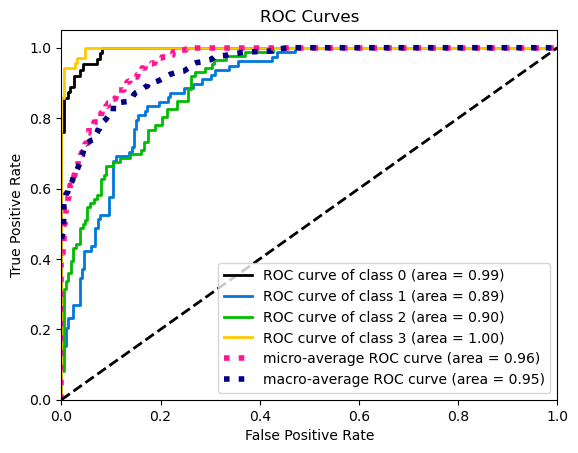

In [17]:
import scikitplot as skplt

y_proba = logreg_clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)

In [18]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [19]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

## Note: For educative pourposes, I decided not to use the PCA implemented function from scikit learn

In [20]:
#PCA 
covMatrix = Xnormal.T.dot(Xnormal) / Xnormal.shape[0] 

'''The (i,j) element of the data covariance matrix contains the covariance between i-th and j-th dimension of the data.
In particular, the diagonal of this matrix contains the variances.
(And since we previously standarized the data, the diagonal should contain ones) 
Furthermore, the covariance matrix is symmetric and positive semi-definite.
We can compute the SVD factorization of the data covariance matrix: '''

print(covMatrix.shape)


(19, 19)


In [21]:
#P - Matrix of column eigenvectors, D - array of eigenvalues (np.diag(D) - to make it diagonal matrix), Q - inverse of P
# From theory follows that -> covMatrix = P * diag(D) * Q - Singular values decomposition 
P, D, Q = np.linalg.svd(covMatrix) 

print(P.shape)
print(D.shape)
print(Q.shape)

(19, 19)
(19,)
(19, 19)


In [22]:
#Checking if covMatrix == P @ diag(D) @ Q

svdResMatrix = P @ np.diag(D) @ Q
print(np.isclose(covMatrix, svdResMatrix).all()) #Returns True if each pair of element matrix-wise is same/closely enough

True


In [23]:
#Sorting the eigenvalues en descending order and rearranging the eigenvectors position based on the sorted eigenvalues 
sorted_indexes = np.argsort(D)[::-1]
D = D[sorted_indexes]
P = P[sorted_indexes]


Where the eigenvalues $\lambda$ from $D$ are equal to the square of the singular values $\sigma^2$, 
that is, they are the variance,
so, if we want to know how much variance is being capture in the first $k$ eigenvalues, 
then we check the sum of the first $k$ eigenvalues and we divide it by the sum of all eigenvalues,
that is: $\frac{\sum_{i = 1}^{k}\lambda_i}{\sum_{i = 1}^{D.shape[0]}\lambda_i}$


In [24]:
eigensum = np.sum(D)
variance_explained = np.array( [(i / eigensum) * 100 for i in D ] )
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained.shape)

for i in range (0, D.shape[0]):
    print(f"Variance explained by the first {i + 1} Principal Components = {cumulative_variance_explained[i]:.02f}%")

(19,)
Variance explained by the first 1 Principal Components = 49.63%
Variance explained by the first 2 Principal Components = 65.55%
Variance explained by the first 3 Principal Components = 75.60%
Variance explained by the first 4 Principal Components = 81.82%
Variance explained by the first 5 Principal Components = 87.02%
Variance explained by the first 6 Principal Components = 91.81%
Variance explained by the first 7 Principal Components = 94.61%
Variance explained by the first 8 Principal Components = 96.48%
Variance explained by the first 9 Principal Components = 97.65%
Variance explained by the first 10 Principal Components = 98.48%
Variance explained by the first 11 Principal Components = 98.96%
Variance explained by the first 12 Principal Components = 99.29%
Variance explained by the first 13 Principal Components = 99.52%
Variance explained by the first 14 Principal Components = 99.70%
Variance explained by the first 15 Principal Components = 99.81%
Variance explained by the fi

## Plotting the Explained Variance plot

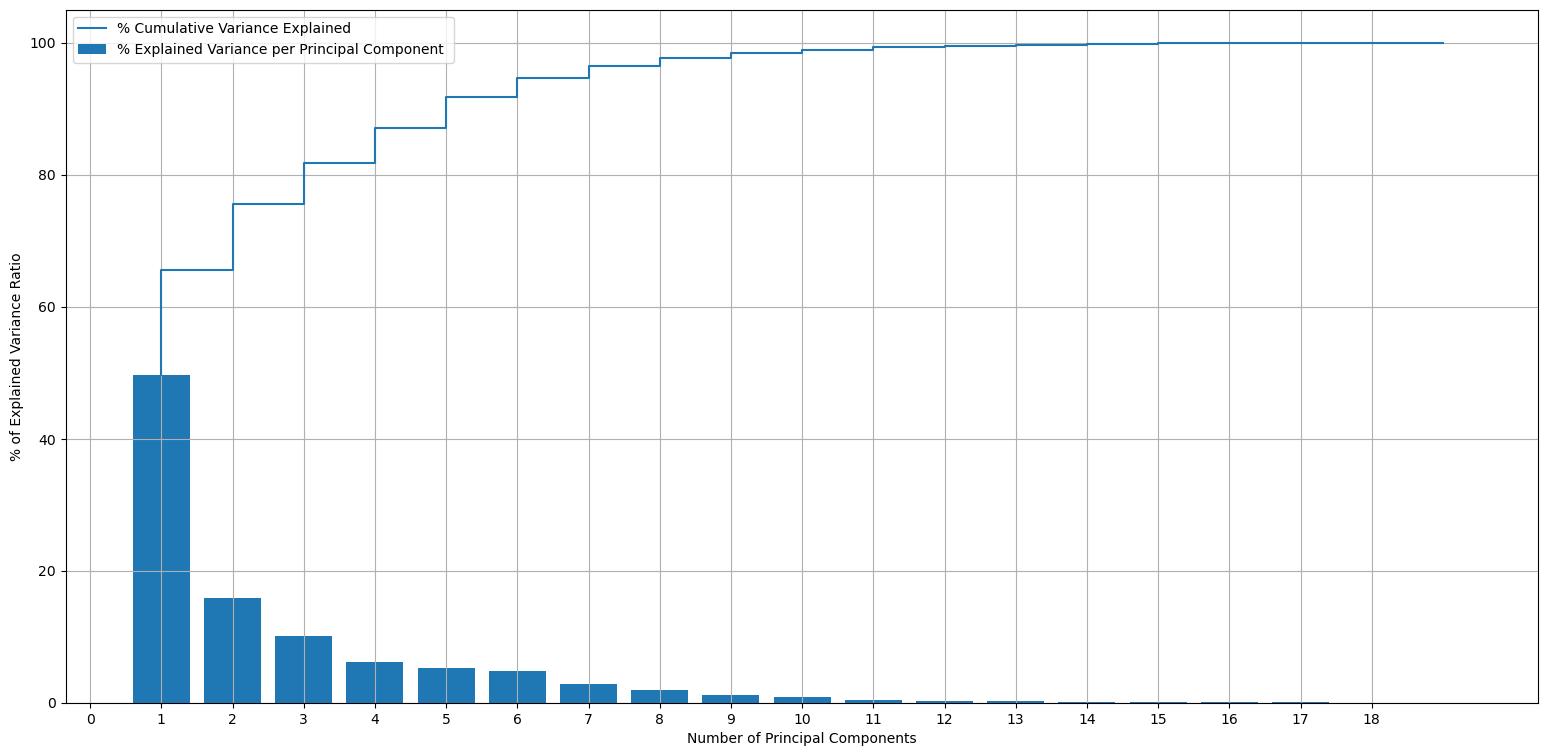

In [25]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (19, 9))
plt.step(range(1, 20), cumulative_variance_explained, label = '% Cumulative Variance Explained')
plt.bar(range(1, 20), variance_explained, label = "% Explained Variance per Principal Component ")
plt.xlabel("Number of Principal Components")
plt.ylabel("% of Explained Variance Ratio") 
plt.legend(loc = 'best') 
plt.xticks(range(0, 19))
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [26]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

From the previous graph, we see that the first 10 components explain about of 97% - 98% of the data, 
so because of that, we will use the first 10 components. 
The data was previously normalized, as mentioned above on the preprocessing part: 
$$
\quad
$$
Since PCA analysis is applied the data was previously normalized, so, for example, if a feature/column set has data expressed in units of Kilograms, Light years, or Millions, the variance scale is huge in the training set, If PCA is applied on such a feature set, the resultant loadings for features with high variance will also be large. Hence, principal components will be biased towards features with high variance, leading to false results.

Feature/Column wise standarization is performed to this end, that is, each columns is standarized, 
meaning that, for each column $\mu = 0$ - mean is zero, and $\sigma = 1$ - standard deviation equal to one, so the standarization is:
$$
z = \frac{\mathbf{x} - \mu}{\sigma}
$$
where 
$$
\mu = \frac{1}{N}\sum_{i = 1}^{N}x_i \quad \sigma = \sqrt{\frac{1}{N}{\sum_{i=1}^{N}(x_i - \mu)^{2}}} 
$$

So,
$$
\quad
$$
StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed column/feature-wise in an independent way.
$$
\quad
$$
StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [27]:
#The principal components are given by T = X * P - where P is the matrix of eigenvectors columns calculated above

X_reduced = Xnormal.dot(P[:, :10]) 

print(X_reduced.shape) 


#*****Splitting the train and test sets based on the PCA reduced data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 10)
(549, 10) (549,) (297, 10) (297,)


In [28]:
print(X_train.mean(axis = 0), X_test.mean(axis = 0) ) #Checking the mean of the columns  
print(X_train.var(axis = 0), X_test.var(axis = 0) ) #Checking the standard deviation approximatly one

[-0.02015344  0.00071448 -0.06297016  0.02193521 -0.00471683  0.01229294
  0.01901628  0.01601631  0.00501142 -0.00372666] [ 0.03725333 -0.0013207   0.11639938 -0.0405469   0.00871899 -0.02272331
 -0.03515131 -0.02960592 -0.00926353  0.00688868]
[9.32643094 2.96311815 1.4281969  1.20312144 0.98112454 0.87072926
 0.53767958 0.34717686 0.21731352 0.16183844] [9.62105044 3.13759902 2.7755831  1.14182466 0.99970842 0.98046346
 0.52285168 0.36941678 0.2269251  0.1504925 ]


Notice in the previous cell, that the standard deviation for each column is not one, to correct this, 
we can apply the methd known as "whitening":
""The whitening operation takes the data in the eigenbasis and divides every dimension by the eigenvalue to normalize the scale. 
The geometric interpretation of this transformation is that if the input data is a multivariable gaussian, 
then the whitened data will be a gaussian with zero mean and identity covariance matrix."

In [29]:
'''Withening  - Is it necessary??
"Warning: Exaggerating noise. Note that we’re adding 1e-5 (or a small constant) to prevent division by zero. 
One weakness of this transformation is that it can greatly exaggerate the noise in the data,
since it stretches all dimensions (including the irrelevant dimensions of tiny variance that are mostly noise)
to be of equal size in the input. This can in practice be mitigated by stronger smoothing 
(i.e. increasing 1e-5 to be a larger number)." '''

X_train = X_train / np.sqrt(D[:10] + 1e-5)
X_test = X_test / np.sqrt(D[:10] + 1e-5)


print(X_train.mean(axis = 0), X_test.mean(axis = 0) ) #Checking that the columns have mean approximatly zero 
print(X_train.var(axis = 0), X_test.var(axis = 0) ) #Checking that the columns have standard deviation approximatly one 


[-0.00656265  0.00041084 -0.04558085  0.02017162 -0.00474611  0.01288975
  0.02604353  0.02686346  0.01066635 -0.00937867] [ 0.01213095 -0.00075943  0.08425551 -0.03728694  0.00877311 -0.0238265
 -0.04814108 -0.0496567  -0.01971658  0.01733634]
[0.98895184 0.97974302 0.74831314 1.01743733 0.99334286 0.95732684
 1.00849118 0.97667359 0.98445847 1.02500129] [1.02019257 1.03743441 1.45428499 0.96560081 1.01215817 1.07797455
 0.98067943 1.03923865 1.0280002  0.95314194]


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [30]:
### YOUR CODE HERE

'''***************** Check bellow, in the next few cells my solution is presented and explained! '''

'***************** Check bellow, in the next few cells my solution is presented and explained! '

## My solution

## Finding optimal hyperparameters for C and penalty norm on the PCA-transformed data

Cross validation grid search is used for a set of 20 different (along a logarithmic base 10 scale) values for C and for l2 and l1 norms, using as scoring f1 and accuracy.
Two estimators are refitted relative to the best f1 and accuracy score, 
the scores are compared and the final model, with its optimal hyperparameters, is choosen as the one that yields the best score along with its hyperparameters

In [31]:
logreg_clf_pca_red = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
print(logreg_clf_pca_red)


C_range = np.logspace(-4, 4, 20)
penalty_range = np.array(['l2', 'l1'])
grid_search_CV_parameters = {
        'C':C_range,
        'penalty':penalty_range
        }
scoring = {'f1':'f1_micro','accuracy':'accuracy'}

LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)


In [32]:
#**************First refitting relative to the best f1 score for the with PCA reduced data 

gridsearchCV_result = GridSearchCV(logreg_clf_pca_red, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'f1' , n_jobs=-1 )

#Performing cross validated grid search and refitting relative to the best f1 score for the with PCA reduced data 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_forf1 = gridsearchCV_result.best_estimator_
best_f1score = gridsearchCV_result.best_score_
best_estimator_params_forf1 = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =\n{best_estimator_forf1}
*****Grid search-CV best f1 score = {best_f1score}
*****Grid search-CV best parameters for best estimator refitted for f1 = {best_estimator_params_forf1}
''')

Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for f1 =
LogisticRegression(C=1.623776739188721, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)
*****Grid search-CV best f1 score = 0.6902251876563803
*****Grid search-CV best parameters for best estimator refitted for f1 = {'C': 1.623776739188721, 'penalty': 'l2'}



In [33]:
#**************Now refitting relative to the best accuracy score with PCA reduced data 

gridsearchCV_result = GridSearchCV(logreg_clf_pca_red, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , scoring = scoring, refit = 'accuracy' , n_jobs=-1 )

print(gridsearchCV_result)


#Performing cross validated grid search and refitting relative to the best accuracy score with PCA reduced data 
gridsearchCV_result.fit(X_train, y_train) 

best_estimator_foraccuracy = gridsearchCV_result.best_estimator_
best_accuracyscore = gridsearchCV_result.best_score_
best_estimator_params_foraccuracy = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator refitted for accuracy =\n{best_estimator_foraccuracy}
*****Grid search-CV best accuracy score = {best_accuracyscore}
*****Grid search-CV best parameters for best estimator refitted for accuracy = {best_estimator_params_foraccuracy}
''')

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': array(['l2', 'l1'], dtype='<U2')},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_micro'}, verbose=1)
Fitting 5 folds for each of 40 candidates, totalling 200 fits

##############################################################
###  Grid Search Cross Validation results
##############################

In [34]:
#Comparing the best scores of the two estimators, and selecting the one with the best score along with its optimal hyperparameters 

if (max(best_f1score, best_accuracyscore) == best_accuracyscore ):
    logreg_clf_pca_red = best_estimator_foraccuracy
    optC = best_estimator_params_foraccuracy['C']
    optpenalty = best_estimator_params_foraccuracy['penalty']
else:
    logreg_clf_pca_red = best_estimator_forf1
    optC = best_estimator_params_forf1['C']
    optpenalty = best_estimator_params_forf1['penalty']
    
print(f"Estimator = {logreg_clf_pca_red},\nOptimal hyperparameters -> C = {optC}, penalty = {optpenalty}") 

Estimator = LogisticRegression(C=1.623776739188721, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001),
Optimal hyperparameters -> C = 1.623776739188721, penalty = l2


## Estimating the quality using f1 and accuracy score for the Logistic Regression model trained with the PCA reduced data 

In [35]:
#Doing some predictions with the classifier and printing scores 

y_pred = logreg_clf_pca_red.predict(X_test)

###################################################
### Counting missclasified samples and calculating accuracy score
##################################################

f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
missclfd = ( y_pred != y_test ).sum()


print(f'''
#######################################################
***** Missclassified count = {missclfd} testing samples out of {len(y_test)} testing samples ,
***** Missclassified percentage = {((missclfd / len(y_test)) * 100.0):.2f} %
***** f1 score = {f1}
***** Accuracy Score = {accuracy}
#######################################################  
''')
print(f'''
######################################
### Classification Report for optimal hyperparamenter C = {optC}, penalty = {optpenalty} 
######################################
{classification_report(y_test, y_pred)}
      ''')


#######################################################
***** Missclassified count = 89 testing samples out of 297 testing samples ,
***** Missclassified percentage = 29.97 %
***** f1 score = 0.7003367003367004
***** Accuracy Score = 0.7003367003367004
#######################################################  


######################################
### Classification Report for optimal hyperparamenter C = 1.623776739188721, penalty = l2 
######################################
              precision    recall  f1-score   support

         bus       0.79      0.92      0.85        78
        opel       0.55      0.48      0.51        71
        saab       0.55      0.48      0.51        79
         van       0.85      0.93      0.89        69

    accuracy                           0.70       297
   macro avg       0.69      0.70      0.69       297
weighted avg       0.68      0.70      0.69       297

      


## Plotting the ROC-curve for the Logistic Regression model trained with PCA reduced data 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

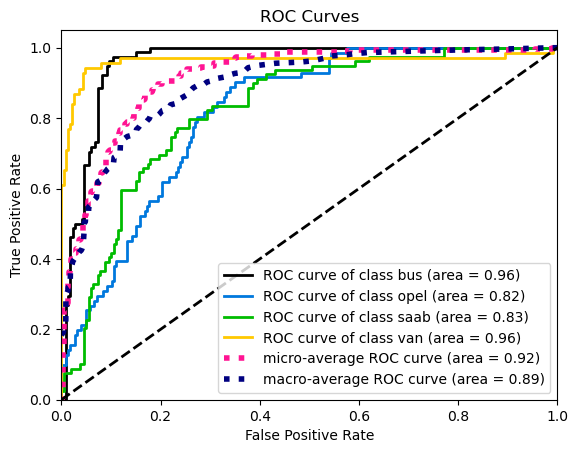

In [36]:
y_proba = logreg_clf_pca_red.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [37]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dectree_clf = DecisionTreeClassifier()
print(dectree_clf)

grid_search_CV_parameters = {'max_depth':range(3, 50)}

gridsearchCV_result = GridSearchCV(dectree_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , n_jobs=-1 )

#Performing cross validated grid search and refitting
gridsearchCV_result.fit(X_train, y_train) 

best_estimator = gridsearchCV_result.best_estimator_
best_estimator_params = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator =\n{best_estimator}
*****Grid search-CV best maximum depth = {best_estimator_params}
''')

DecisionTreeClassifier()
Fitting 5 folds for each of 47 candidates, totalling 235 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator =
DecisionTreeClassifier(max_depth=12)
*****Grid search-CV best maximum depth = {'max_depth': 12}



## Estimating the model quality using f1 and accuracy score for the Decision Tree model trained with PCA reduced data

In [38]:
#Doing some predictions with the classifier and printing scores 

dectree_clf = best_estimator
optMaxdepth = best_estimator_params
y_pred = dectree_clf.predict(X_test)

###################################################
### Counting missclasified samples and calculating accuracy score
##################################################

f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
missclfd = ( y_pred != y_test ).sum()


print(f'''
#######################################################
***** Missclassified count = {missclfd} testing samples out of {len(y_test)} testing samples ,
***** Missclassified percentage = {((missclfd / len(y_test)) * 100.0):.2f} %
***** f1 score = {f1}
***** Accuracy Score = {accuracy}
#######################################################  
''')
print(f'''
######################################
### Classification Report for optimal hyperparamenter max_depth = {optMaxdepth}
######################################
{classification_report(y_test, y_pred)}
      ''')


#######################################################
***** Missclassified count = 108 testing samples out of 297 testing samples ,
***** Missclassified percentage = 36.36 %
***** f1 score = 0.6363636363636364
***** Accuracy Score = 0.6363636363636364
#######################################################  


######################################
### Classification Report for optimal hyperparamenter max_depth = {'max_depth': 12}
######################################
              precision    recall  f1-score   support

         bus       0.85      0.90      0.88        78
        opel       0.47      0.48      0.48        71
        saab       0.44      0.39      0.41        79
         van       0.75      0.78      0.77        69

    accuracy                           0.64       297
   macro avg       0.63      0.64      0.63       297
weighted avg       0.63      0.64      0.63       297

      


## Plotting the ROC-curve for the Decision Tree model trained PCA reduced data

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

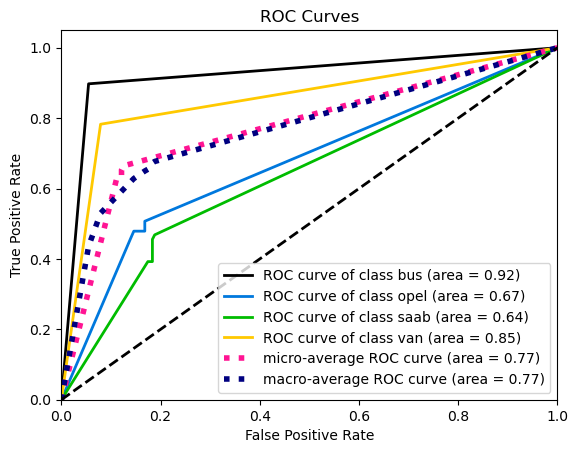

In [39]:
y_proba = dectree_clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [40]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [41]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
randtree_clf = RandomForestClassifier(random_state = 117)
print(randtree_clf)
n_estimators = [int(i) for i in np.linspace(start = 50, stop = 500, num = 10)]
max_depth = range(3, 50)

grid_search_CV_parameters = {
        'n_estimators':n_estimators,
        'max_depth':max_depth
        }

print(randtree_clf, grid_search_CV_parameters)

RandomForestClassifier(random_state=117)
RandomForestClassifier(random_state=117) {'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_depth': range(3, 50)}


In [42]:
gridsearchCV_result = GridSearchCV(randtree_clf, grid_search_CV_parameters, verbose = 1,
                           cv = 5 , n_jobs=-1 )

#Performing cross validated grid search and refitting
gridsearchCV_result.fit(X_train, y_train) 

best_estimator = gridsearchCV_result.best_estimator_
best_estimator_params = gridsearchCV_result.best_params_
print(f'''
##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator =\n{best_estimator}
*****Grid search-CV best maximum depth = {best_estimator_params}
''')

Fitting 5 folds for each of 470 candidates, totalling 2350 fits

##############################################################
###  Grid Search Cross Validation results
##############################################################
*****Grid search-CV best estimator =
RandomForestClassifier(max_depth=9, random_state=117)
*****Grid search-CV best maximum depth = {'max_depth': 9, 'n_estimators': 100}



In [43]:
#Doing some predictions with the classifier and printing scores 

randtree_clf = best_estimator
optMaxdepthrand = best_estimator_params['max_depth']
optn_estimators = best_estimator_params['n_estimators']
y_pred = randtree_clf.predict(X_test)

###################################################
### Counting missclasified samples and calculating accuracy score
##################################################

f1 = f1_score(y_test, y_pred, average='micro')
accuracy = accuracy_score(y_test, y_pred)
missclfd = ( y_pred != y_test ).sum()


print(f'''
#######################################################
***** Missclassified count = {missclfd} testing samples out of {len(y_test)} testing samples ,
***** Missclassified percentage = {((missclfd / len(y_test)) * 100.0):.2f} %
***** f1 score = {f1}
***** Accuracy Score = {accuracy}
#######################################################  
''')
print(f'''
######################################
### Classification Report for optimal hyperparamenter max_depth = {optMaxdepthrand} and number of trees = {optn_estimators}
######################################
{classification_report(y_test, y_pred)}
      ''')


#######################################################
***** Missclassified count = 88 testing samples out of 297 testing samples ,
***** Missclassified percentage = 29.63 %
***** f1 score = 0.7037037037037037
***** Accuracy Score = 0.7037037037037037
#######################################################  


######################################
### Classification Report for optimal hyperparamenter max_depth = 9 and number of trees = 100
######################################
              precision    recall  f1-score   support

         bus       0.84      0.97      0.90        78
        opel       0.55      0.46      0.50        71
        saab       0.55      0.52      0.53        79
         van       0.82      0.86      0.84        69

    accuracy                           0.70       297
   macro avg       0.69      0.70      0.69       297
weighted avg       0.69      0.70      0.69       297

      


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

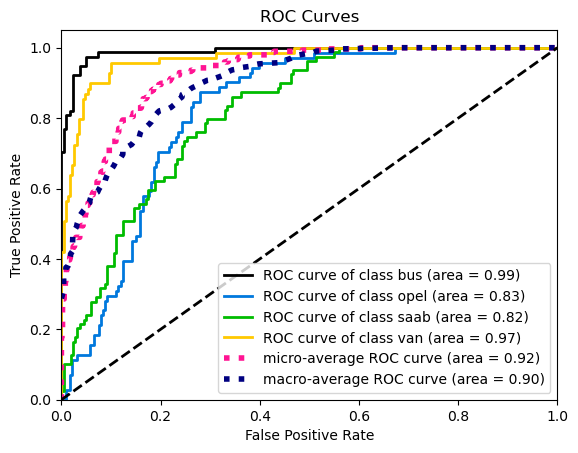

In [44]:
y_proba = randtree_clf.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [45]:
# YOUR CODE HERE